# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.display import display, HTML
import networkx as nx

In [64]:
# Data with no interventions

data1_none = pd.read_csv("data/data_50.csv", index_col = 0)
data1_i1 = pd.read_csv("data/data_52.csv", index_col = 0)
data1_p1 = pd.read_csv("data/data_54.csv", index_col = 0)
data1_s1 = pd.read_csv("data/data_55.csv", index_col = 0)
data1_b1 = pd.read_csv("data/data_56.csv", index_col = 0)
data1_k1 = pd.read_csv("data/data_57.csv", index_col = 0)
data1_a1 = pd.read_csv("data/data_58.csv", index_col = 0)

data2_none = pd.read_csv("data/data_203.csv", index_col = 0)
data2_i1 = pd.read_csv("data/data_204.csv", index_col = 0)
data2_p1 = pd.read_csv("data/data_205.csv", index_col = 0)
data2_s1 = pd.read_csv("data/data_206.csv", index_col = 0)
data2_b1 = pd.read_csv("data/data_207.csv", index_col = 0)
data2_k1 = pd.read_csv("data/data_208.csv", index_col = 0)
data2_a1 = pd.read_csv("data/data_209.csv", index_col = 0)

data_none = pd.concat((data1_none, data2_none))
data_i1 = pd.concat((data1_i1, data2_i1))
data_p1 = pd.concat((data1_p1, data2_p1))
data_s1 = pd.concat((data1_s1, data2_s1))
data_b1 = pd.concat((data1_b1, data2_b1))
data_k1 = pd.concat((data1_k1, data2_k1))
data_a1 = pd.concat((data1_a1, data2_a1))


display(data_i1.head())

display(data1_i1.loc[9, :])
display(data2_i1.loc[9, :])

,I,P,S,B,K,A
0,1.0,1.831245,1.0,0.831245,0.817665,0.281843
1,1.0,0.946620,1.0,-0.053380,0.715057,1.047280
2,1.0,1.522322,1.0,1.522322,0.788869,0.832774
3,1.0,3.547774,1.0,2.547774,0.857583,3.059168
4,1.0,1.981449,0.0,0.981449,0.647220,0.484284


I    1.000000
P    1.411324
S    1.000000
B    0.411324
K    0.586963
A    0.622460
Name: 9, dtype: float64

I    1.000000
P    6.931452
S    0.000000
B    5.931452
K    0.883092
A    0.048511
Name: 9, dtype: float64

# Statistics


In [69]:
no_means = data_none.mean()
i1_means = data_i1.mean()
p1_means = data_p1.mean()
s1_means = data_s1.mean()
b1_means = data_b1.mean()
k1_means = data_k1.mean()
a1_means = data_a1.mean()

means = pd.DataFrame(list(zip(no_means, i1_means, p1_means, s1_means, b1_means, k1_means, a1_means)), 
             columns = ["None", "I1", "P1", "S1", "B1", "K1", "A1"], index = ["I", "P", "S", "B", "K", "A"])


print("\033[1mMeans with the different interventions\033[0m")
display(means)

mean_diff = means.sub(means["None"], axis = 0).divide(means["None"], axis = 0)
diff_bound = .3

print("\n\033[1mThe difference in means when making interventions\033[0m")
mean_diff_marked = mean_diff.style.applymap(lambda x: 'background-color : yellow' if abs(x)>diff_bound else '')
display(mean_diff_marked)

no_var = data_none.var()
i1_var = data_i1.var()
p1_var = data_p1.var()
s1_var = data_s1.var()
b1_var = data_b1.var()
k1_var = data_k1.var()
a1_var = data_a1.var()

var = pd.DataFrame(list(zip(no_var, i1_var, p1_var, s1_var, b1_var, k1_var, a1_var)), 
             columns = ["None", "I1", "P1", "S1", "B1", "K1", "A1"], index = ["I", "P", "S", "B", "K", "A"])

print("\033[1mVariance with the different interventions\033[0m")
display(var)

var_diff = var.sub(var["None"], axis = 0).divide(var["None"], axis = 0)
diff_bound = .3

print("\n\033[1mThe difference in variance when making interventions\033[0m")
var_diff_marked = var_diff.style.applymap(lambda x: 'background-color : yellow' if abs(x)>diff_bound else '')
display(var_diff_marked)

corr_bound = .3
print("\n\033[1mCorrelations in dataset without interventions\033[0m")
corrs = data_none.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x) > corr_bound else '')
display(corrs)

Means with the different interventions


,None,I1,P1,S1,B1,K1,A1
I,0.658246,1.000000,0.728103,0.593190,0.382877,0.972088,0.443240
P,1.621691,2.169202,1.000000,2.063143,1.999107,1.469201,2.049530
S,0.690000,0.586667,0.506667,1.000000,0.640000,0.586667,0.600000
B,1.463445,1.822535,0.885230,2.189953,1.000000,1.190447,2.206290
K,0.640138,0.609441,0.601816,0.577989,0.566252,1.000000,0.573578
A,0.937030,0.986444,0.560663,0.784277,0.424349,0.685565,1.000000



The difference in means when making interventions


,None,I1,P1,S1,B1,K1,A1
I,0,0.519188,0.106126,-0.098833,-0.418338,0.476784,-0.326636
P,0,0.337617,-0.38336,0.272217,0.232729,-0.0940315,0.263822
S,0,-0.149758,-0.2657,0.449275,-0.0724638,-0.149758,-0.130435
B,0,0.245373,-0.395105,0.496437,-0.316681,-0.186545,0.507601
K,0,-0.0479535,-0.059866,-0.0970867,-0.115423,0.562163,-0.103977
A,0,0.0527348,-0.40166,-0.163018,-0.547134,-0.268364,0.0672015


Variance with the different interventions


,None,I1,P1,S1,B1,K1,A1
I,1.020683,0.000000,1.131185,1.129836,1.018332,1.349477,0.826889
P,11.734395,9.166471,0.000000,10.763118,14.136652,14.918605,10.970363
S,0.216061,0.245766,0.253333,0.000000,0.233514,0.245766,0.243243
B,12.086881,9.078262,1.331296,11.432870,0.000000,14.411004,11.598818
K,0.037962,0.030254,0.032966,0.038489,0.041021,0.000000,0.047007
A,20.399864,12.133347,2.521472,19.898788,0.904555,8.138942,0.000000



The difference in variance when making interventions


,None,I1,P1,S1,B1,K1,A1
I,0,-1,0.108262,0.106941,-0.00230365,0.322131,-0.189868
P,0,-0.218837,-1,-0.0827718,0.204719,0.271357,-0.0651104
S,0,0.137485,0.172511,-1,0.0807778,0.137485,0.12581
B,0,-0.248916,-0.889856,-0.0541092,-1,0.192285,-0.0403796
K,0,-0.203036,-0.131588,0.0138899,0.0805915,-1,0.238271
A,0,-0.405224,-0.876398,-0.0245627,-0.955659,-0.60103,-1



Correlations in dataset without interventions


,I,P,S,B,K,A
I,1,0.294752,0.114201,-0.0219928,0.227879,-0.026065
P,0.294752,1,0.0783216,0.931738,-0.0243929,-0.00809864
S,0.114201,0.0783216,1,0.0596112,-0.117627,0.0664413
B,-0.0219928,0.931738,0.0596112,1,-0.0994197,0.0188889
K,0.227879,-0.0243929,-0.117627,-0.0994197,1,-0.0688925
A,-0.026065,-0.00809864,0.0664413,0.0188889,-0.0688925,1


In [70]:
caus = np.zeros(np.shape(mean_diff))

mean_bound = .1
var_bound = .1
corr_bound = .0


for i in range(np.shape(mean_diff)[0]):
    for j in range(np.shape(mean_diff)[1]):
        cond1 = i != j-1
        cond2 = abs(mean_diff.iloc[i, j]) > mean_bound
        cond3 = abs(var_diff.iloc[i,j]) > var_bound
        cond4 = True if j == 0 else abs(data_none.corr().iloc[i, j-1]) > corr_bound
        
        if cond1  & cond2 & cond3 & cond4:
            caus[i, j] = 1

caus = pd.DataFrame(caus, columns = mean_diff.columns, index = mean_diff.index)

caus_styled = caus.style.applymap(lambda x: 'background-color : yellow' if abs(x)==1 else '')
display(caus_styled)
        

,None,I1,P1,S1,B1,K1,A1
I,0,0,1,0,0,1,1
P,0,1,0,0,1,0,0
S,0,1,1,0,0,1,1
B,0,1,1,0,0,1,0
K,0,0,0,0,0,0,1
A,0,0,1,0,1,1,0


In [71]:
bound = .2
print("\n\033[1mCorrelations in dataset without interventions\033[0m")
display(data_none.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x) > bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on I\033[0m")
display(data_i1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on P\033[0m")
display(data_p1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on S\033[0m")
display(data_s1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on B\033[0m")
display(data_b1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on K\033[0m")
display(data_k1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))
print("\n\033[1mCorrelations in dataset with intervention on A\033[0m")
display(data_a1.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>bound else ''))


Correlations in dataset without interventions


,I,P,S,B,K,A
I,1,0.294752,0.114201,-0.0219928,0.227879,-0.026065
P,0.294752,1,0.0783216,0.931738,-0.0243929,-0.00809864
S,0.114201,0.0783216,1,0.0596112,-0.117627,0.0664413
B,-0.0219928,0.931738,0.0596112,1,-0.0994197,0.0188889
K,0.227879,-0.0243929,-0.117627,-0.0994197,1,-0.0688925
A,-0.026065,-0.00809864,0.0664413,0.0188889,-0.0688925,1



Correlations in dataset with intervention on I


,I,P,S,B,K,A
I,nan,nan,nan,nan,nan,nan
P,nan,1,0.00769803,0.972616,0.125032,0.047645
S,nan,0.00769803,1,0.0190743,0.0578212,0.227892
B,nan,0.972616,0.0190743,1,0.124556,0.0465685
K,nan,0.125032,0.0578212,0.124556,1,0.126743
A,nan,0.047645,0.227892,0.0465685,0.126743,1



Correlations in dataset with intervention on P


,I,P,S,B,K,A
I,1,nan,-0.125904,-0.806278,0.167832,0.0129404
P,nan,nan,nan,nan,nan,nan
S,-0.125904,nan,1,0.0623818,-0.080666,0.308174
B,-0.806278,nan,0.0623818,1,-0.129249,-0.0223006
K,0.167832,nan,-0.080666,-0.129249,1,-0.112849
A,0.0129404,nan,0.308174,-0.0223006,-0.112849,1



Correlations in dataset with intervention on S


,I,P,S,B,K,A
I,1,0.202015,nan,-0.161488,0.250188,0.0329372
P,0.202015,1,nan,0.910508,0.101417,-0.336929
S,nan,nan,nan,nan,nan,nan
B,-0.161488,0.910508,nan,1,0.0476585,-0.328393
K,0.250188,0.101417,nan,0.0476585,1,0.0428118
A,0.0329372,-0.336929,nan,-0.328393,0.0428118,1



Correlations in dataset with intervention on B


,I,P,S,B,K,A
I,1,0.458442,-0.0637608,nan,-0.062455,0.0118324
P,0.458442,1,0.112842,nan,-0.0838061,0.0967026
S,-0.0637608,0.112842,1,nan,-0.148829,0.450338
B,nan,nan,nan,nan,nan,nan
K,-0.062455,-0.0838061,-0.148829,nan,1,-0.0651647
A,0.0118324,0.0967026,0.450338,nan,-0.0651647,1



Correlations in dataset with intervention on K


,I,P,S,B,K,A
I,1,0.207214,0.026222,-0.0923489,nan,-0.0293165
P,0.207214,1,0.133488,0.934732,nan,0.216867
S,0.026222,0.133488,1,0.124157,nan,-0.0214363
B,-0.0923489,0.934732,0.124157,1,nan,0.237352
K,nan,nan,nan,nan,nan,nan
A,-0.0293165,0.216867,-0.0214363,0.237352,nan,1



Correlations in dataset with intervention on A


,I,P,S,B,K,A
I,1,0.10265,-0.131114,-0.132557,0.246819,nan
P,0.10265,1,-0.133196,0.951676,-0.247996,nan
S,-0.131114,-0.133196,1,-0.134756,-0.131866,nan
B,-0.132557,0.951676,-0.134756,1,-0.280705,nan
K,0.246819,-0.247996,-0.131866,-0.280705,1,nan
A,nan,nan,nan,nan,nan,nan


# The causal graph

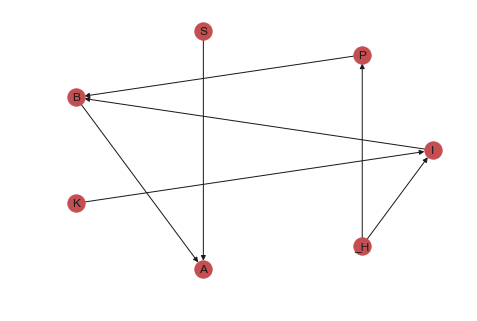

In [73]:
G = nx.DiGraph()
G.add_nodes_from(["I", "P", "S", "B", "K", "A", "_H"])
G.add_edges_from([("S", "A"), ("B", "A"), ("K", "A"), ('P', 'B'), ('P', 'A'), ('I', 'P')])


# initial graph

G1 = nx.DiGraph()
G1.add_nodes_from(["I", "P", "S", "B", "K", "A", "_H"])
G1.add_edges_from([("S", "A"), ("B", "A"), ("I", "B"), ("P", "B"), ("K", "I"), ("_H", "I"), ("_H", "P")])

#final

G_final = nx.DiGraph()
G_final.add_nodes_from(["I", "P", "S", "B", "K", "A", "_H"])
G_final.add_edges_from([("S", "A"), ("B", "A"), ("I", "B"), ("P", "B"), ("K", "I"), ("_H", "I"), ("_H", "P")])

nx.draw_shell(G_final, with_labels = True)